In [65]:
from read_ggp_run import *
from cells_simulation import *
import scipy.stats


In [66]:
# -------------------------------------------------- #
# Setup
# -------------------------------------------------- #

paramter_settings = {'mean_lambda': 'bound',
                    'gamma_lambda': 'bound',
                    'var_lambda': 'bound',
                    'mean_q': 'bound',
                    'gamma_q': 'bound',
                    'var_q':'bound',
                    'beta':'bound',
                    'var_x':'bound',
                    'var_g':'bound',
                    'var_dx':'bound',
                    'var_dg':'bound'} 

directory = '../data/var_dg_timer_cells/var_dg_timer_cells_2/'
sample = 'var_dg_timer_cells_2'

filebase = default_filebase(directory, sample) # default
save_plots = True
# -------------------------------------------------- #


In [67]:
dat_file = get_data_file(directory, sample)

minimization_iter_file, minimization_final_file = get_minimization_file(filebase, paramter_settings)
scan_files = get_scan_files(filebase, paramter_settings)

prediction_file_f, prediction_file_b, prediction_file = get_prediction_files(filebase)
_, _, prediction_file_no_min = get_prediction_files(default_filebase(directory, sample, ext="_no_min"))


if save_plots:
    plot_file = filebase
else:
    plot_file = None 

In [68]:
scan_files

['../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/var_dg_timer_cells_2_scan_mean_lambda.csv',
 '../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/var_dg_timer_cells_2_scan_gamma_lambda.csv',
 '../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/var_dg_timer_cells_2_scan_var_lambda.csv',
 '../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/var_dg_timer_cells_2_scan_mean_q.csv',
 '../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/var_dg_timer_cells_2_scan_gamma_q.csv',
 '../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/var_dg_timer_cells_2_scan_var_q.csv',
 '../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/var_dg_timer_cells_2_scan_beta.csv',
 '../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/var_dg_timer_cells_2_scan_var_x.csv',
 '../data/var_dg_timer_cells/var_dg_timer_cells_2/var_dg_timer_cells_2_out/v

## Paramter Scans
- 1D paramter scans 

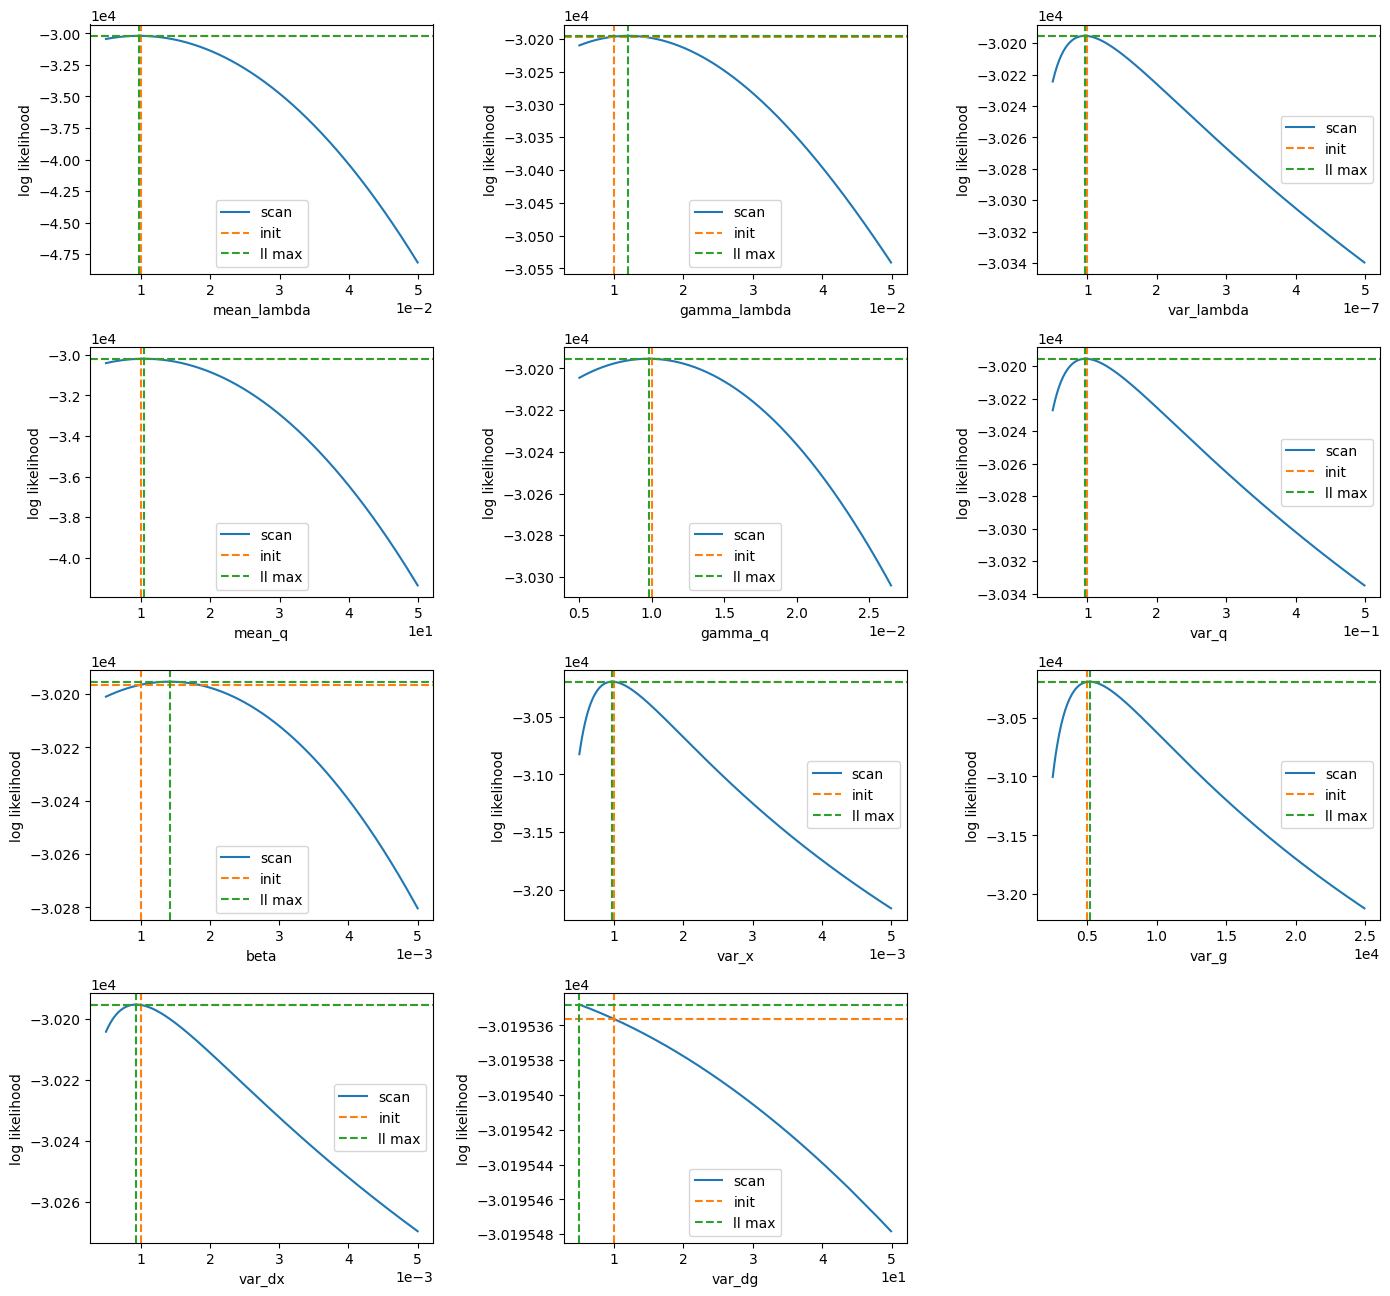

In [69]:
if len(scan_files) >0:
    plot_1dscans(scan_files, plot_file)

## Minimization
- plot the minimization process, ie the log likelihood for all iteration steps

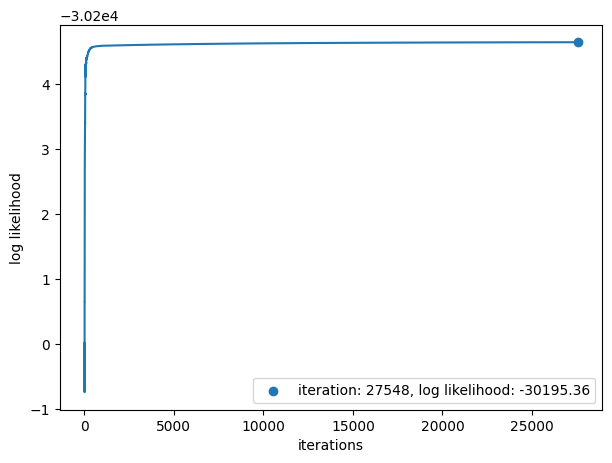

In [70]:
plot_minimization(minimization_iter_file, plot_file)

## Prediction
- plots the combined backward-forward prediction as well as both predictions seperately and the original data

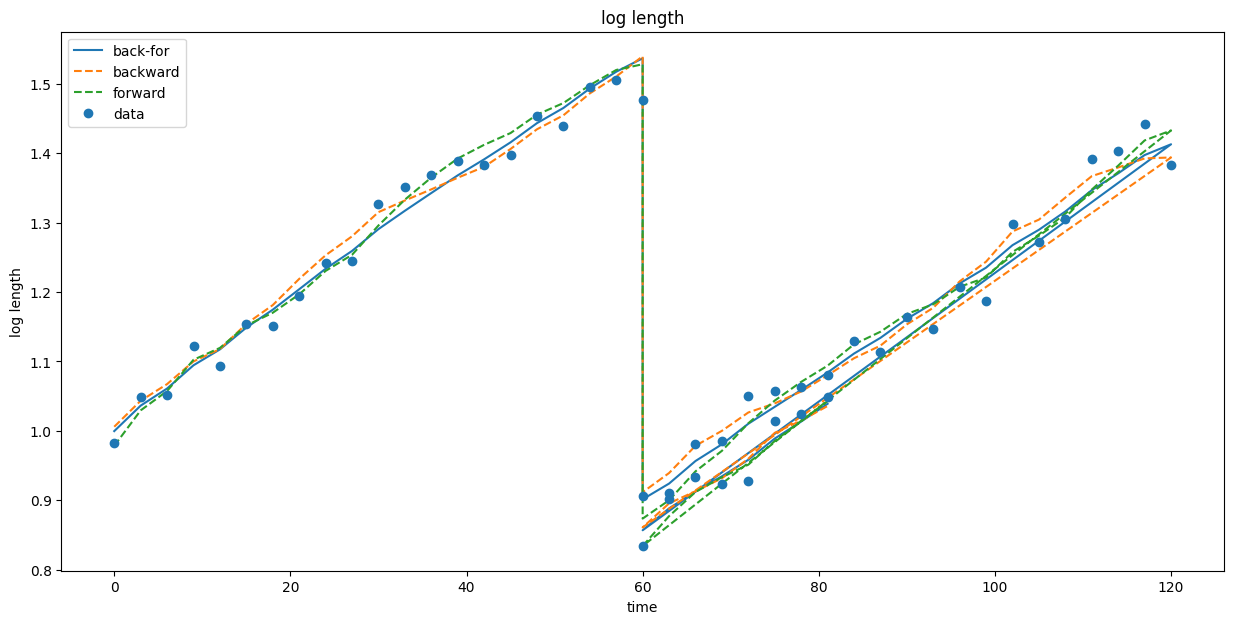

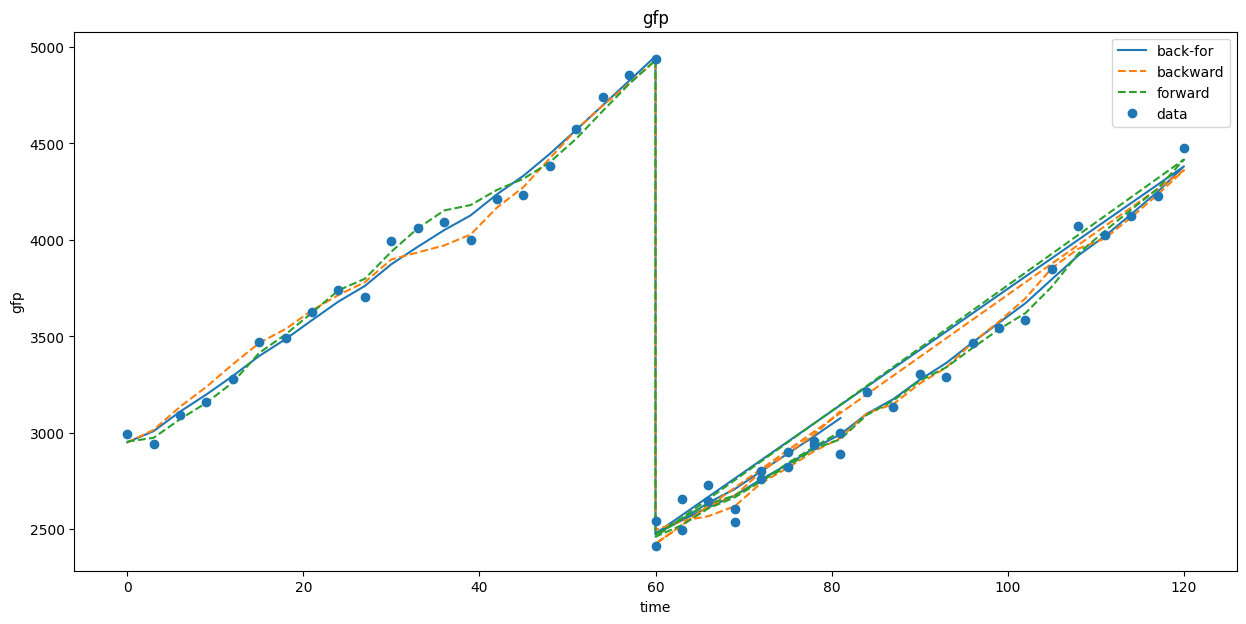

In [71]:
########################################################################
prediction = pd.read_csv(prediction_file, skiprows=13)
backward_prediction = pd.read_csv(prediction_file_b, skiprows=13)
forward_prediction = pd.read_csv(prediction_file_f, skiprows=13)

if os.path.isfile(prediction_file_no_min):
    prediction_no_min = pd.read_csv(prediction_file_no_min, skiprows=13)
else:
    prediction_no_min = None

indata = pd.read_csv(dat_file)


data_slice = slice(0, 50)

compare_predictions([prediction, backward_prediction, forward_prediction], ['back-for', 'backward', 'forward'], 'mean_x', prediction, 'log_length', data_slice, "log length", plot_file=plot_file)
compare_predictions([prediction, backward_prediction, forward_prediction], ['back-for', 'backward', 'forward'], 'mean_g', prediction, 'fp',data_slice, "gfp", plot_file=plot_file)


## Error estimation
- plot the error for a range of epsilons of the finit differnce estimation of the hessian, check if the estimation is numerically stable, ie close to constant for a range of epsilons

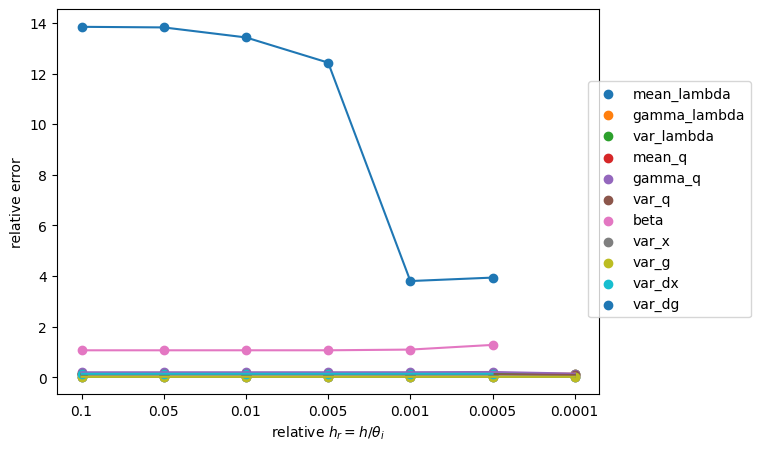

In [72]:
final_params = pd.read_csv(minimization_final_file, nrows=11)['final']
errors = pd.read_csv(minimization_final_file, skiprows=14)
    
plot_errors(errors, final_params, plot_file)

## Compare final and initial parameters

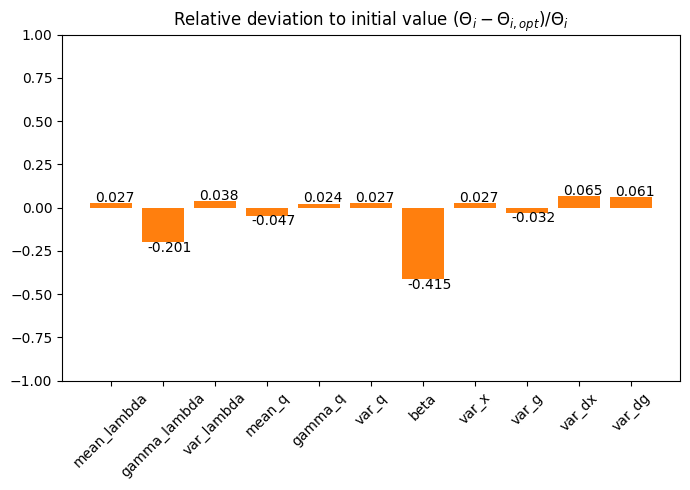

,parameter,simulation,minimization,relative deviation
0,mean_lambda,1.000000e-02,9.731390e-03,0.026861
1,gamma_lambda,1.000000e-02,1.200820e-02,-0.200820
2,var_lambda,1.000000e-07,9.615390e-08,0.038461
3,mean_q,1.000000e+01,1.047230e+01,-0.047230
4,gamma_q,1.000000e-02,9.763350e-03,0.023665
5,var_q,1.000000e-01,9.726620e-02,0.027338
6,beta,1.000000e-03,1.415110e-03,-0.415110
7,var_x,1.000000e-03,9.731050e-04,0.026895
8,var_g,5.000000e+03,5.159570e+03,-0.031914
9,var_dx,1.000000e-03,9.354840e-04,0.064516


In [73]:

compare_init_final(minimization_iter_file, plot_file)
